## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [41]:
! git clone https://github.com/jjordan4234/MLlabs

fatal: destination path 'MLlabs' already exists and is not an empty directory.


In [42]:
! ls MLlabs

01_api_calls       02_scraping        03_computer_vision README.md


1.) Load the neccessary packages

In [2]:
pip install keras

     |████████████████████████████████| 1.7 MB 6.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

     |████████████████████████████████| 244.3 MB 17 kB/s s eta 0:00:01    |█████▏                          | 39.9 MB 4.6 MB/s eta 0:00:45     |██████▊                         | 51.0 MB 13.7 MB/s eta 0:00:15     |██████▊                         | 51.2 MB 13.7 MB/s eta 0:00:15     |██████▊                         | 51.7 MB 13.7 MB/s eta 0:00:15     |████████▌                       | 64.6 MB 2.0 MB/s eta 0:01:32     |█████████▏                      | 70.1 MB 16.2 MB/s eta 0:00:11     |█████████████████               | 129.1 MB 21.2 MB/s eta 0:00:06     |██████████████████▎             | 139.4 MB 13.1 MB/s eta 0:00:08     |████████████████████▋           | 157.0 MB 12.0 MB/s eta 0:00:08     |█████████████████████▊          | 166.2 MB 15.3 MB/s eta 0:00:06     |█████████████████████████████   | 222.2 MB 3.3 MB/s eta 0:00:07     |█████████████████████████████▌  | 225.3 MB 3.3 MB/s eta 0:00:06     |███████████████████████████████▋| 241.3 MB 1.1 MB/s eta 0:00:03
     |█████████████████████████

    Uninstalling zipp-3.4.1:
      Successfully uninstalled zipp-3.4.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.5
    Uninstalling protobuf-4.21.5:
      Successfully uninstalled protobuf-4.21.5
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.5.2
    Uninstalling google-auth-oauthlib-0.5.2:
      Successfully uninstalled google-auth-oauthlib-0.5.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade numpy keras tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

/Users/johnjordan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


2.) Import the data and split it into train and test sets

In [20]:
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

3.) Convert the test set into a matrix

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

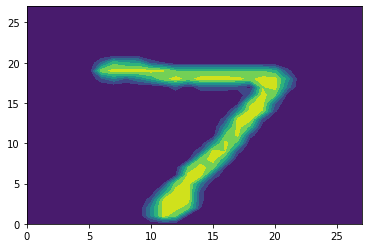

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

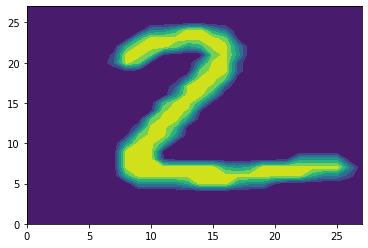

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

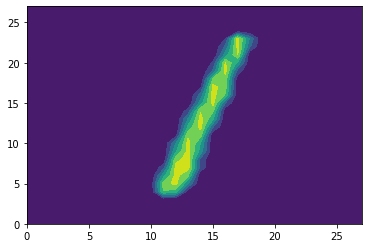

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

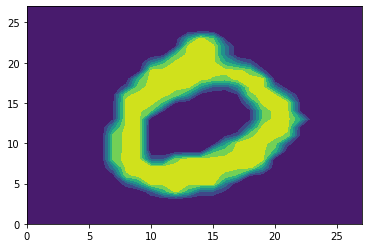

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

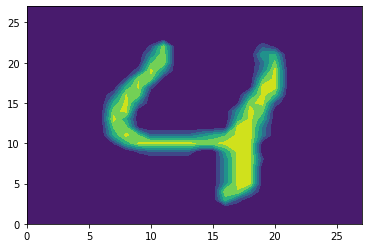

In [21]:
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

4.) What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


5.) Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the  𝑖𝑛𝑑𝑒𝑥
 -th element of X_test into a  28×28=784
 -length row vector of values, rather than a matrix. Turn X_train into an  𝑁×784
  matrix  𝑋
  that is suitable for scikit-learn's kNN classifier where  𝑁
  is the number of observations and  784=28∗28
  (you could use, for example, a for loop)

In [6]:
import pandas as pd
import os

In [23]:
# Create the directory if it doesn't exist
data_dir = './03_computer_vision/data/'
os.makedirs(data_dir, exist_ok=True)

In [24]:

reload = 1  # Set this to 1 to create the CSV files

if reload == 1:  # If reload is 1, do the reshaping process
    Z_train = []
    for i in range(60000):
        row = X_train[i].reshape((1, 784))  # Turn the matrix for i into a row vector of features
        Z_train.append(row[0])  # Append the row vector to the list
    Z_train = pd.DataFrame(Z_train)
    Z_train.to_csv(os.path.join(data_dir, 'Z_train.csv'), index=False)  # Save without index

    Z_test = []
    for i in range(len(y_test)):
        row = X_test[i].reshape((1, 784))  # Turn the matrix for i into a row vector of features
        Z_test.append(row[0])  # Append the row vector to the list
    Z_test = pd.DataFrame(Z_test)
    Z_test.to_csv(os.path.join(data_dir, 'Z_test.csv'), index=False)  # Save without index
else:  # If reload is not 1, just load the reshaped data
    Z_train = pd.read_csv(os.path.join(data_dir, 'Z_train.csv'))
    Z_test = pd.read_csv(os.path.join(data_dir, 'Z_test.csv'))

6.) Use the reshaped X_test and y_test data to create a  𝑘
 -nearest neighbor classifier of digit. What is the optimal number of neighbors  𝑘
 ? If you can't determine this, play around with different values of  𝑘
  for your classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Reshape the data in case it's misformatted
X_train = X_train.reshape(-1, 3)  # Ensures it's a 2D array with 3 columns
X_test = X_test.reshape(-1, 3)

ValueError: cannot reshape array of size 7840000 into shape (3)

In [26]:
## Solve for k that maximizes accuracy:
N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)  # Create a model for k
    fitted_model = model.fit(X_train, y_train)     # Train the model
    y_hat = fitted_model.predict(X_test)           # Predict values for test set
    Acc[k] = np.sum(y_hat == y_test) / N_test

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(Acc_max)
print(k_star)

NameError: name 'KNeighborsClassifier' is not defined

7.) So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)